In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns
sns.set()

from sklearn.datasets import load_wine

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [7]:
# 와인 데이터 불러오기
wine = load_wine()

In [9]:
# 와인 데이터 정보
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [10]:
# 데이터 프레임 생성
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [2]:
# seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [12]:
# 데이터셋 구성
x_data = wine_df.drop('target', axis=1)
y_data = wine_df['target']

x_data.shape, y_data.shape

((178, 13), (178,))

In [14]:
# 모델 구성
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [21]:
# 모델 컴파일
# target이 다중이면서 LabelEncoding되 있을 때 sparse_categorical_crossentropy 사용
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
# 폴더가 존재하지 않으면 생성
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [19]:
# 모델 업데이트 및 저장
# 에포크 3자리수로, 테스트 오차 소수 넷째자리까지 저장
modelpath = MODEL_DIR + '{epoch:03d}-{val_loss:.4f}.hdf5'
# 테스트 오차를 모니터링하면서 앞서 저장한 모델보다 나아졌을 때만 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [18]:
# 학습 자동 중단 설정
# 100번 동안 테스트 오차가 줄지 않으면 학습을 멈춘다
earlystop = EarlyStopping(monitor='val_loss', patience=100)

In [22]:
# 모델 실행
# train:test = 8:2
history = model.fit(x_data, y_data, validation_split=0.2, epochs=3000, batch_size=500, verbose=0, 
         callbacks=[earlystop, checkpointer])


Epoch 00001: val_loss improved from inf to 48.57328, saving model to ./model/01-48.5733.hdf5

Epoch 00002: val_loss improved from 48.57328 to 43.87584, saving model to ./model/02-43.8758.hdf5

Epoch 00003: val_loss improved from 43.87584 to 42.12574, saving model to ./model/03-42.1257.hdf5

Epoch 00004: val_loss improved from 42.12574 to 41.46442, saving model to ./model/04-41.4644.hdf5

Epoch 00005: val_loss improved from 41.46442 to 41.13070, saving model to ./model/05-41.1307.hdf5

Epoch 00006: val_loss did not improve from 41.13070

Epoch 00007: val_loss did not improve from 41.13070

Epoch 00008: val_loss did not improve from 41.13070

Epoch 00009: val_loss did not improve from 41.13070

Epoch 00010: val_loss improved from 41.13070 to 40.97300, saving model to ./model/10-40.9730.hdf5

Epoch 00011: val_loss improved from 40.97300 to 39.10249, saving model to ./model/11-39.1025.hdf5

Epoch 00012: val_loss improved from 39.10249 to 37.31340, saving model to ./model/12-37.3134.hdf5




Epoch 00110: val_loss did not improve from 0.91234

Epoch 00111: val_loss did not improve from 0.91234

Epoch 00112: val_loss did not improve from 0.91234

Epoch 00113: val_loss did not improve from 0.91234

Epoch 00114: val_loss did not improve from 0.91234

Epoch 00115: val_loss did not improve from 0.91234

Epoch 00116: val_loss did not improve from 0.91234

Epoch 00117: val_loss did not improve from 0.91234

Epoch 00118: val_loss did not improve from 0.91234

Epoch 00119: val_loss did not improve from 0.91234

Epoch 00120: val_loss did not improve from 0.91234

Epoch 00121: val_loss did not improve from 0.91234

Epoch 00122: val_loss did not improve from 0.91234

Epoch 00123: val_loss did not improve from 0.91234

Epoch 00124: val_loss did not improve from 0.91234

Epoch 00125: val_loss did not improve from 0.91234

Epoch 00126: val_loss did not improve from 0.91234

Epoch 00127: val_loss did not improve from 0.91234

Epoch 00128: val_loss did not improve from 0.91234

Epoch 00129

In [61]:
# 학습 오차, 테스트 오차, 테스트 정확도 저장
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']

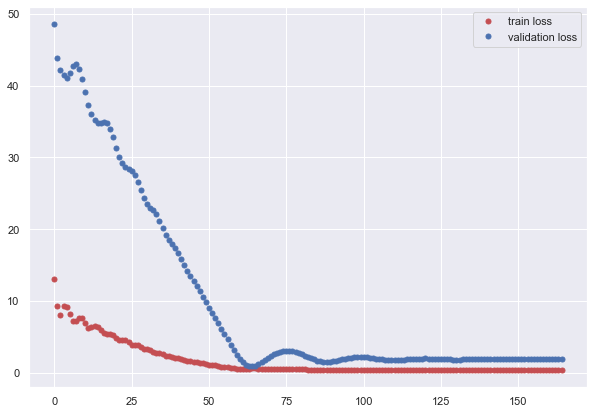

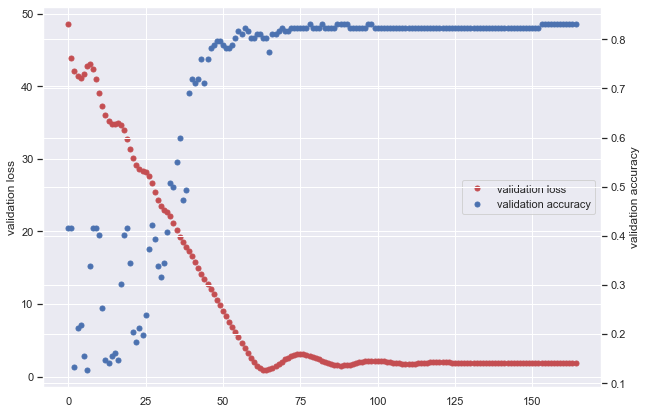

In [64]:
fig, ax1 = plt.subplots()
ln1 = ax1.plot(val_loss, 'o', c='r', markersize=5, label='validation loss')
ax2 = ax1.twinx()
ln2 = ax2.plot(acc, 'o', c='b', markersize=5, label='validation accuracy')

lns = ln1 + ln2
labs = [ln.get_label() for ln in lns]
ax1.legend(lns, labs, loc='center right')
ax1.set_ylabel('validation loss')
ax2.set_ylabel('validation accuracy')
plt.show()

학습 횟수가 증가함에 따라 테스트 오차는 줄어들고 정확도는 향상됨을 확인할 수 있다

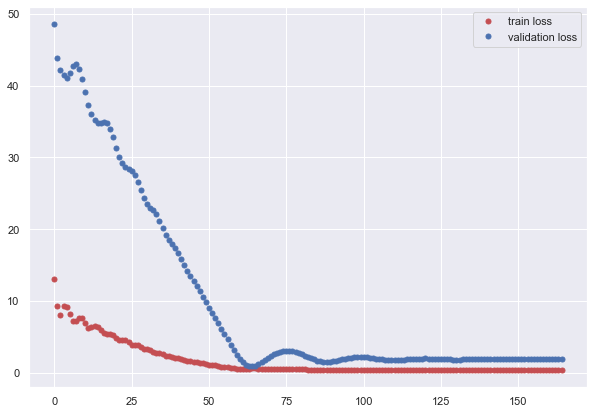

In [63]:
plt.plot(loss, 'o', c='r', markersize=5, label='train loss')
plt.plot(val_loss, 'o', c='b', markersize=5, label='validation loss')
plt.legend()
plt.show()

과적합이 일어나기 전에 학습을 끝낸 것을 알 수 있다